# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель:
Вам нужно научиться определять рыночную стоимость объектов недвижимости.** 

### Откройте файл с данными и изучите общую информацию

1. Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.
2. Изучите общую информацию о полученном датафрейме.
3. Постройте гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

In [1]:
#1. Загрузим данные с помощью библиотеки pandas
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


#2. Изучим общую информацию о полученном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

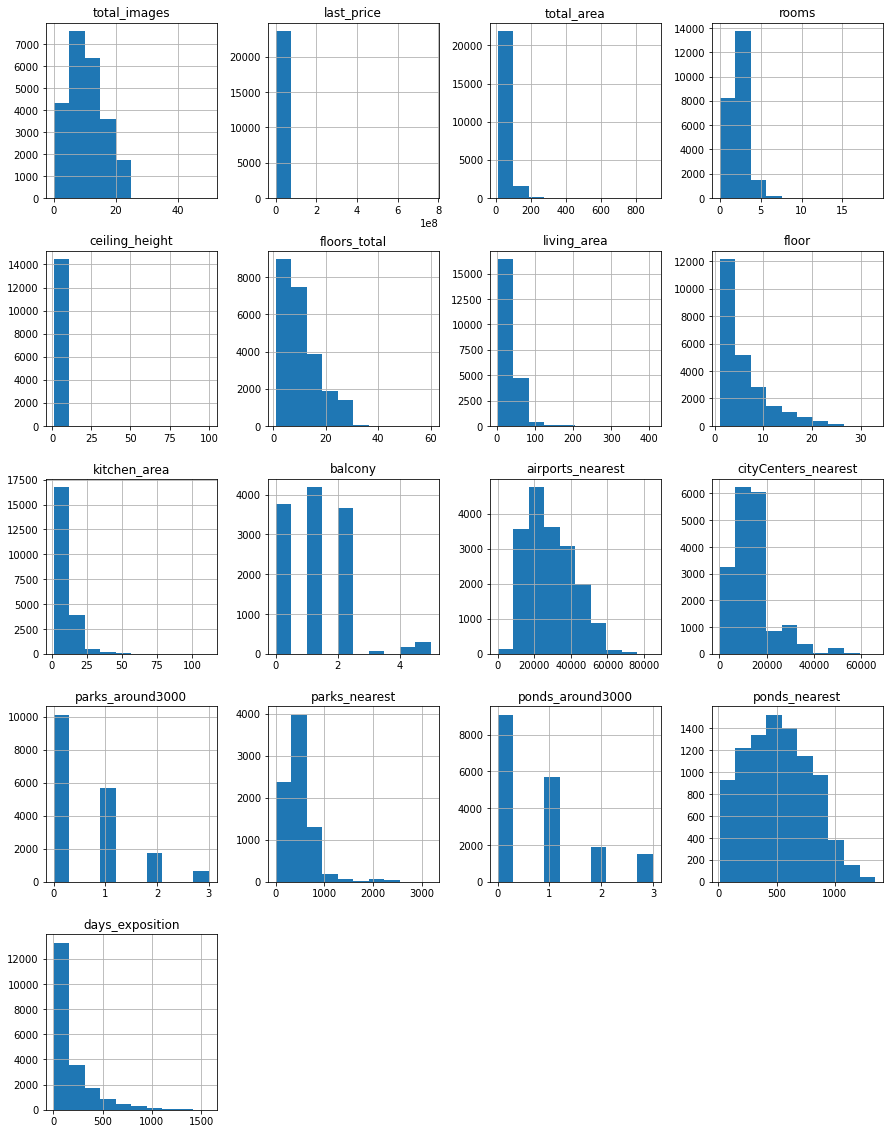

In [2]:
#3. Построим гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20))

### Выполните предобработку данных

1. Найдите и изучите пропущенные значения в столбцах:  
    1. Определите, в каких столбцах есть пропуски.
    2. Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
    3. В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
2. Рассмотрите типы данных в каждом столбце:
    1. Найдите столбцы, в которых нужно изменить тип данных.  
    2. Преобразуйте тип данных в выбранных столбцах.
    3. В ячейке с типом markdown поясните, почему нужно изменить тип данных.
3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

#### Найдите и изучите пропущенные значения в столбцах ####

In [3]:
#1.1 Определим, в каких столбцах есть пропуски
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим пропуски в заполнении:
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. floors_total — всего этажей в доме
7. is_apartment — апартаменты (булев тип)
8. kitchen_area — площадь кухни в квадратных метрах (м²)
9. last_price — цена на момент снятия с публикации
10. living_area — жилая площадь в квадратных метрах (м²)
11. locality_name — название населённого пункта
12. parks_around3000 — число парков в радиусе 3 км
13. parks_nearest — расстояние до ближайшего парка (м)
14. ponds_around3000 — число водоёмов в радиусе 3 км
15. ponds_nearest — расстояние до ближайшего водоёма (м)


In [4]:
#1. Расстояние до аэропорта не заполнено у 5542 записей. 
#Данные заполнялись автоматически, почему у этих записей они не заполнились?
data['airports_nearest'].describe()
#Пока подумаем как можно заполнить пропуски


#2. У 11510 записей не заполнено наличие балкона, скорее всего потому что его нет в квартирах. Заменим пропуски на 0.
data['balcony'] = data['balcony'].fillna('0')


#3. Начнем заполнять высоту потолка, для этого изучим данные столбца
data['ceiling_height'].describe()
#Странным кажется минимальное значение = 1 метру. Возможно имеется ошибка в данных.
#На данном этапе мы еще не отбрасываем экстремумы, поэтому пропуски заполним медианным значением, а не средним.
ceiling_height_median = data['ceiling_height'].median()
print("Медиана высоты потолка =", ceiling_height_median)
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)


#4. Заполним пропуски нулем, предпологаю, что квартиры в центре города.
cityCenters_nearest = data['cityCenters_nearest'].median()
print("Медиана расстояния до центра =", cityCenters_nearest)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(cityCenters_nearest)


#5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].describe()
median_days_exposition = data['days_exposition'].median()
data['days_exposition'] = data['days_exposition'].fillna(median_days_exposition)


#6. floors_total — всего этажей в доме
data['floors_total'].describe()
#median_floors_total = data['floors_total'].median()
#print('Медиана количества этажей в доме =', median_floors_total)
#Пропуск в количестве этажей заполним значением, указанным в ячейке 'floor'
data['floors_total'] = data['floors_total'].fillna(data['floor'])


#7. У 20924 записей не указано апартаменты или жилье. Скорее всего пропуск означает, что это не апартаменты
print(data['is_apartment'].unique())
#Заполним пропуски в is_apartment False
data['is_apartment'] = data['is_apartment'].fillna(False)


#8.Кухни обычно небольшого размера. Посмотрим разброс в значениях
data['kitchen_area'].describe()
#Заполним пропуски медианным значением
kitchen_area_median = data['kitchen_area'].median()
print("Медиана кухонной площади =", kitchen_area_median)
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)


#9. last_price — цена на момент снятия с публикации
data['last_price'].describe()
#подумаем далее над заполнением пропусков


#10. Заполним пропуски жилой площади медианой
data['living_area'].describe()
living_area_median = data['living_area'].median()
print("Медиана жилой площади =", living_area_median)
data['living_area'] = data['living_area'].fillna(living_area_median)

Медиана высоты потолка = 2.65
Медиана расстояния до центра = 13098.5
[nan False True]
Медиана кухонной площади = 9.1
Медиана жилой площади = 30.0


In [5]:
#11. Посмотрим сколько уникальных названий населенных пунктов
len(data['locality_name'].unique())
#Пропущено 49 названий локации


#12. parks_around3000 — число парков в радиусе 3 км
data['parks_around3000'].describe()
#Пропуски могут означать, что в радиусе 3 км нет парков. Заполним пропуски 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)


#13. parks_nearest — расстояние до ближайшего парка (м)
data['parks_nearest'].describe()
#Пропуски могут означать, что парка рядом нет. Пока не будем заполнять пропуски. 
#Проверим у какого количества записей нет парков рядом
print("Кол-во объявлений без ближайших парков = ", len(data.query('parks_around3000 == 0')))
#Количество почти совпало: у 15620 не заполнено расстояние до парка.
#Похоже, в алгоритме заполнения заложено, что если рядом нет парка пропускать значения в данном столбце.


#14. ponds_around3000 — число водоёмов в радиусе 3 км
data['ponds_around3000'].describe()
#Пропуски могут означать, что в радиусе 3 км нет водоемов. Заполним пропуски 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


#15. ponds_nearest — расстояние до ближайшего водоёма (м)
data['ponds_nearest'].describe()
#Пропуски могут означать, что водоемов рядом нет. Пока не будем заполнять пропуски
#Проверим у какого количества записей нет водоемов рядом
print("Кол-во объявлений без ближайших водоемов = ", len(data.query('ponds_around3000 == 0')))
#Количество совпало с количеством пропусков в столбце ponds_nearest.
#Похоже, в алгоритме заполнения заложено, что если рядом нет водоема пропускать значения в данном столбце.

Кол-во объявлений без ближайших парков =  15624
Кол-во объявлений без ближайших водоемов =  14589


#### Рассмотрим типы данных в каждом столбце ####

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
#Изменим типы у столбцов:

#1. floors_total - количество этажей в доме может быть только целым, меняем с float на int, 
#2. balcony - наличие балкона булево значение, 
#3. days_exposition - количество дней - целое

data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('bool')
data['days_exposition'] = data['days_exposition'].astype('int')

<h4>Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты</h4>

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [9]:
#Видно, что названия повторяются, но содеражат разное написание: поселок/посёлок и т.п.
data['locality_name'] = data['locality_name'].str.lower()
duplicates = ['поселок', 'городского типа ', 'городской ', 'коттеджный ', 'деревня']
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace(duplicates, '', regex=True)
print("Кол-во уникальных записей после преобразования = ", len(data['locality_name'].unique()))
print('Безымянных локаций =', data['locality_name'].isna().sum())

Кол-во уникальных записей после преобразования =  316
Безымянных локаций = 49


### Добавьте в таблицу новые столбцы

3.1 цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);  
3.2 день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
3.3 месяц публикации объявления;  
3.4 год публикации объявления;  
3.5 тип этажа квартиры (значения — «‎первый», «последний», «другой»);  
3.6 расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)

In [10]:
#3.1 Добавим столбец с ценой одного квадратного метра c округлением до двух знаков после запятой
data['square_meter_price'] = round(data['last_price']/data['total_area'], 2)

#3.2 Добавим столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#3.3 Добавим столбец с месяцем публикации
data['month_exposition'] = data['first_day_exposition'].dt.month

#3.4 Добавим столбец с годом публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

#3.5 Добавим тип этажа квартиры (значения — «первый», «последний», «другой»)
#Для этого создадим функцию
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif 1 < row['floor'] < row['floors_total']:
        return 'другой'
    
#и с помощью нее категоризуем этажи
data['floor_category'] = data.apply(categorize_floor, axis = 1)

#3.6 Добавим столбец с расстоянием до центра города в км (округленных до целого)
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

1. Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.
**Список параметров:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка
Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.
2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
3. Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).  
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

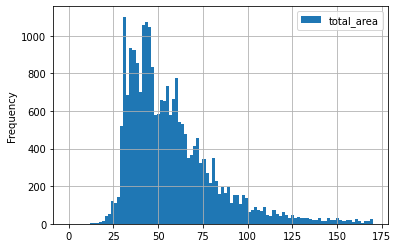

In [11]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, range=(0, 170))
data['total_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

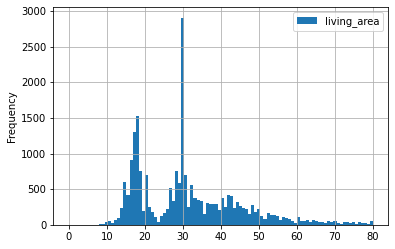

In [12]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, range=(0, 80))
data['living_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

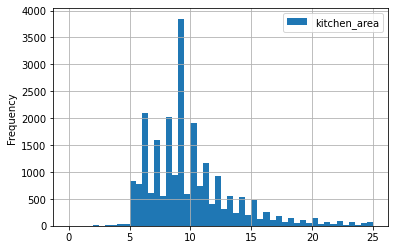

In [13]:
data.plot(y='kitchen_area', kind='hist', bins=50, grid=True, range=(0, 25))
data['kitchen_area'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: plot_price, dtype: float64

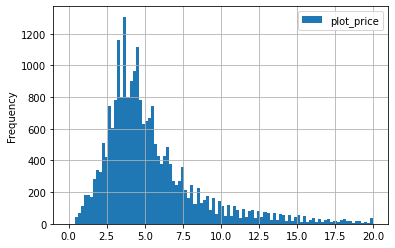

In [14]:
#для наглядности поделим цену на 1000000
data['plot_price']=data['last_price']/1000000
data.plot(y='plot_price', kind='hist', bins=100, grid=True, range=(0, 20))
data['plot_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

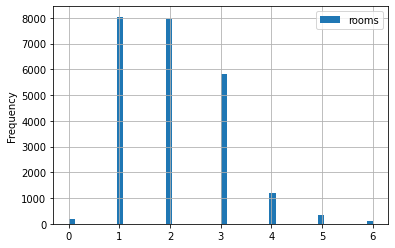

In [15]:
data.plot(y='rooms', kind='hist', bins=50, grid=True, range=(0, 6))
data['rooms'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

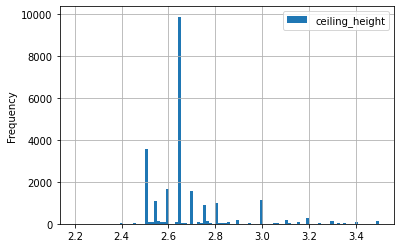

In [16]:
data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, range=(2.2, 3.5))
data['ceiling_height'].describe()

In [17]:
data.plot(y='floor_category', kind='hist')
data['floor_category'].describe()

TypeError: no numeric data to plot

In [ ]:
data.plot(y='floors_total', kind='hist', bins=50, grid=True, range=(1, 30))
data['floors_total'].describe()

count    23699.000000
mean     13936.792797
std       7553.779633
min        181.000000
25%      10927.000000
50%      13098.500000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

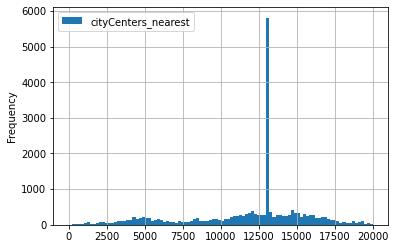

In [18]:
data.plot(y='cityCenters_nearest', kind='hist', bins=100, grid=True, range=(0, 20000))
data['cityCenters_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

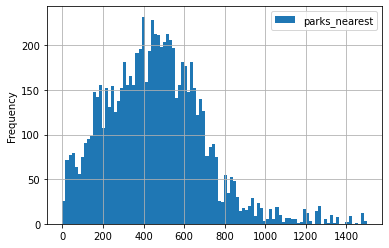

In [21]:
data.plot(y='parks_nearest', kind='hist', bins=100, grid=True, range=(0, 1500))
data['parks_nearest'].describe()

### Напишите общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [ ]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [ ]  Найдены пропущенные значения.
- [ ]  Пропущенные значения заполнены там, где это возможно.
- [ ]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [ ]  Объяснено, в каких столбцах изменён тип данных и почему.
- [ ]  Устранены неявные дубликаты в названиях населённых пунктов.
- [ ]  Обработаны редкие и выбивающиеся значения (аномалии).
- [ ]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.